In [46]:
import numpy as np
from scipy.io import loadmat
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [47]:
def load_images():    
    path1 = r'C:\Users\erikn\skola\EEN020-Computer-Vision\assignment-1\A1data\data\compEx3img1.jpg'
    path2 = r'C:\Users\erikn\skola\EEN020-Computer-Vision\assignment-1\A1data\data\compEx3img2.jpg'
    return cv2.imread(path1), cv2.imread(path2)

In [48]:
def mat_to_np():    
    path = r'C:\Users\erikn\skola\EEN020-Computer-Vision\assignment-1\A1data\data\compEx3.mat'
    mat_data = loadmat(path)
    P1 = np.array(mat_data['P1'])
    P2 = np.array(mat_data['P2'])
    U = np.array(mat_data['U'])
    return P1, P2, U

In [70]:
def to_cart(x):
    return x[:-1]/x[-1]

In [50]:
def normalize(v):
    return v/(v @ v)**0.5

In [71]:
def compute_camera_center(P):
    M = P[:,:3]
    P4 = P[:,-1]
    C = M @ P4
    return C

In [63]:
def compute_principal_axis(P):
    M = P[:,:3]
    m3 = P[-1,:3]
    v = np.linalg.det(M) * m3
    return normalize(v)

In [53]:
def camera_center_and_axis(P):
    C = compute_camera_center(P)
    p_axis = compute_principal_axis(P) 
    return C, p_axis

In [118]:
def plot_camera(P,s):
    C, p_axis = camera_center_and_axis(P)

    ax = plt.axes(projection='3d')
    ax.plot(C[0], C[1], C[2], 'o', color='red', label='Camera center')
    ax.plot(s*p_axis[0], s*p_axis[1], s*p_axis[2], 'o', color='blue', label='$s\\cdot$Principal axis')
    ax.plot([s*p_axis[0],C[0]], [s*p_axis[1],C[1]], [s*p_axis[2],C[2]], '-', color='black')

    plt.legend(loc="upper left")
    plt.show()
    

In [54]:
def rital(img, p1, p2, p3, l1, l2, l3, p):
    
    plt.scatter(p1[0,:], p1[1,:], color='red', label='$p_1$')
    plt.scatter(p2[0,:], p2[1,:], color='blue', label='$p_2$')
    plt.scatter(p3[0,:], p3[1,:], color='lime', label='$p_3$')

    x1, y1 = compute_points(l1, img)
    x2, y2 = compute_points(l2, img)
    x3, y3 = compute_points(l3, img)

    plt.plot(x1, y1, color='red')
    plt.plot(x2, y2, color='blue')
    plt.plot(x3, y3, color='lime')

    plt.plot(p[0], p[1], 'o', color='yellow', label='$l_2\cap l_3$')

    plt.imshow(img)
    plt.legend(loc="lower right")
    plt.show()


Camera center 1: [0. 0. 0.] 
Principal axis 1: [0.31292281 0.94608467 0.08368463]

Camera center 2: [-2.70779491e+06 -1.03343231e+08 -1.43561584e+04] 
Principal axis 2: [0.03186384 0.34016542 0.93982561]


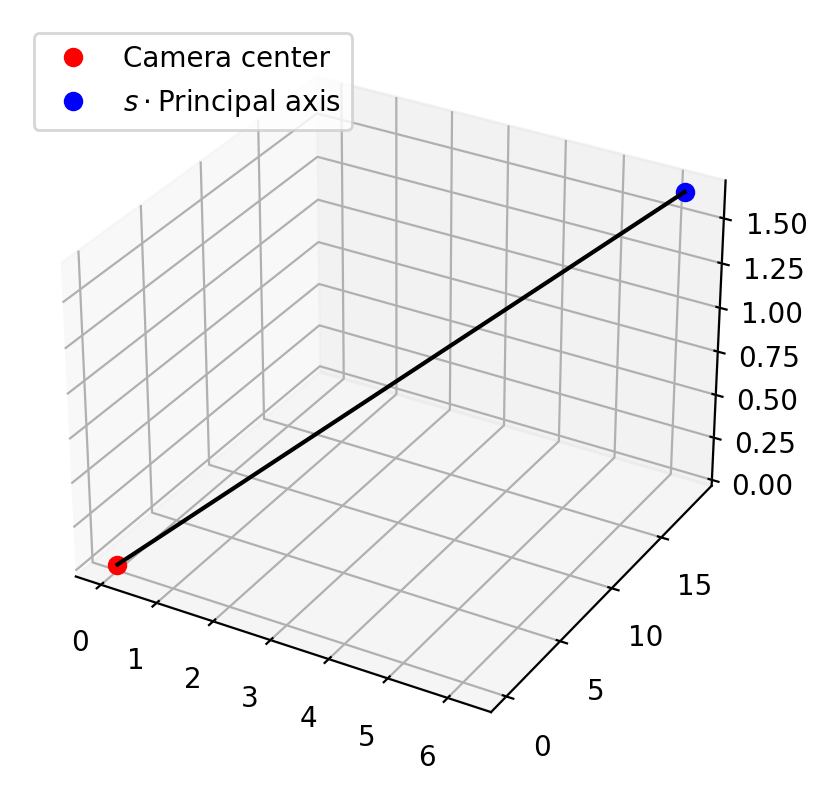

In [119]:
img1, img2 = load_images()
P1, P2, U = mat_to_np()
C1, p_axis1 = camera_center_and_axis(P1)
C2, p_axis2 = camera_center_and_axis(P2)

print('Camera center 1:', C1, '\nPrincipal axis 1:', p_axis1)
print('\nCamera center 2:', C2, '\nPrincipal axis 2:', p_axis2)

s = 20
plot_camera(P1,s)
# rital(img, p1, p2, p3, l1, l2, l3, p)